In [15]:
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

In [2]:
import cv2 as cv

In [4]:
image_color = cv.imread("img.jpg")

In [5]:
image = cv.cvtColor(image_color,cv.COLOR_BGR2GRAY)

In [7]:
f = np.fft.fft2(image)

In [8]:
fshift = np.fft.fftshift(f)

In [10]:
fimg = np.log(np.abs(fshift)+1)

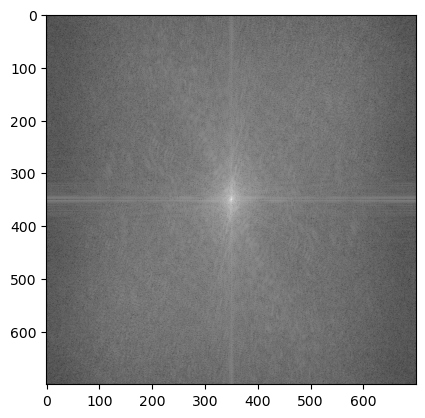

In [12]:
plt.figure()
plt.imshow(fimg, 'gray')
plt.show()

In [35]:
D = 30
rows, cols = image.shape
crow, ccol = int(rows/2),int(cols/2)
mask_low = np.zeros((rows,cols),np.uint8)
for i in range(rows):
    for j in range(cols):
        dis = sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        if dis <= D:
            mask_low[i,j]=1
        else:
            mask_low[i,j] = 0
mask_high = np.zeros((rows,cols),np.uint8)
for i in range(rows):
    for j in range(cols):
        dis = sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        if dis <= D:
            mask_high[i,j]=0
        else:
            mask_high[i,j] = 1

In [36]:
fhigh_shift = fshift*mask_high
fhigh_ishift = np.fft.ifftshift(fhigh_shift)
img_high = np.fft.ifft2(fhigh_ishift)
img_high = np.abs(img_high)

In [37]:
flow_shift = fshift*mask_low
flow_ishift = np.fft.ifftshift(flow_shift)
img_low = np.fft.ifft2(flow_ishift)
img_low = np.abs(img_low)

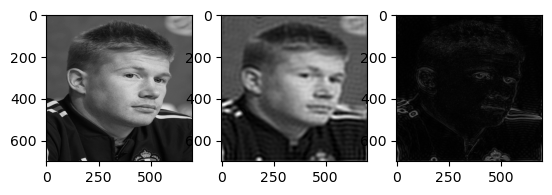

In [38]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(image,plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(img_low,plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(img_high,plt.cm.gray)